In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/AllContainer.xlsx'
df = pd.read_excel(path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 16120508.991952775
R-squared: 0.8529991627686812
Overall MAPE: 18.72436689711571%
Overall MAE: 1923.599802161857


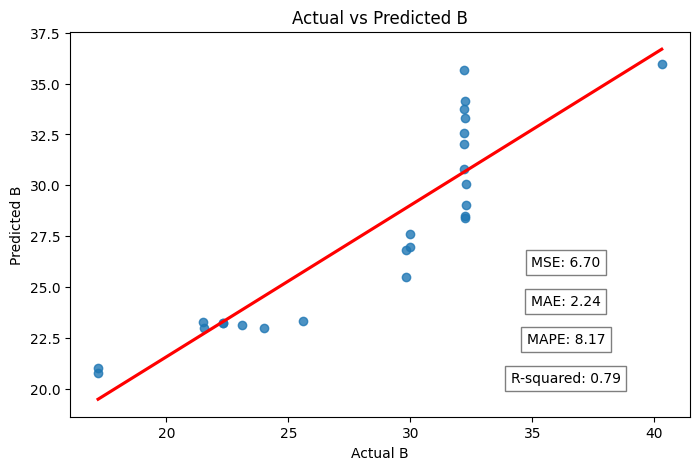

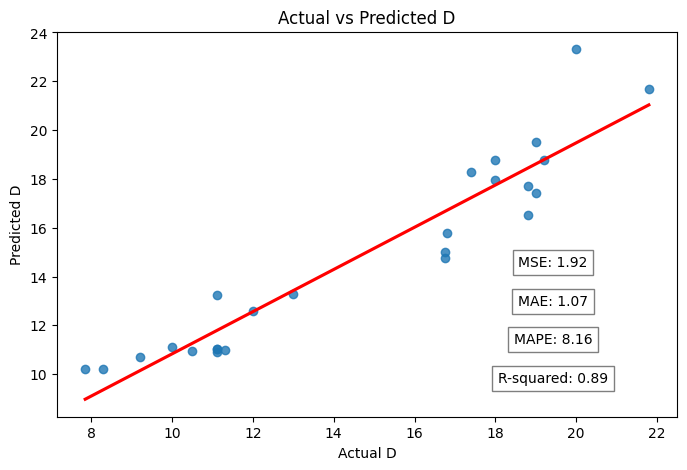

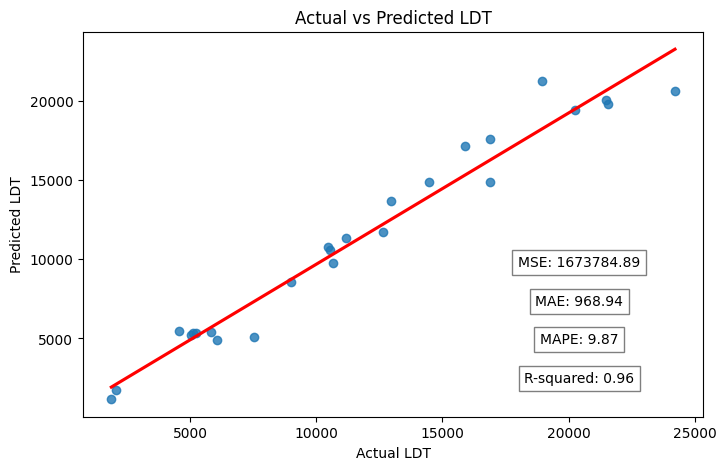

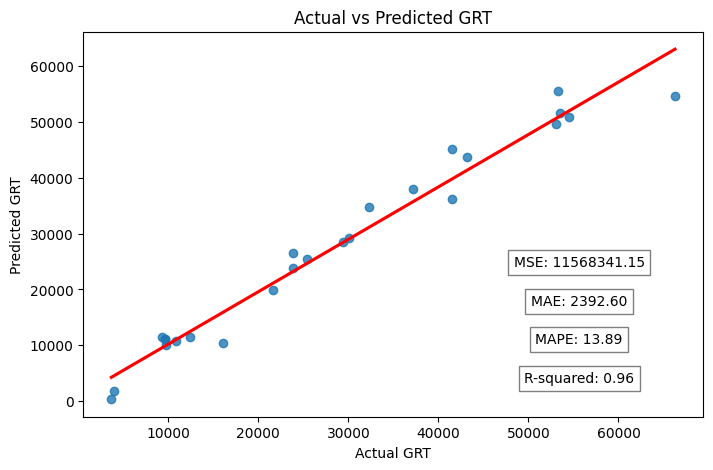

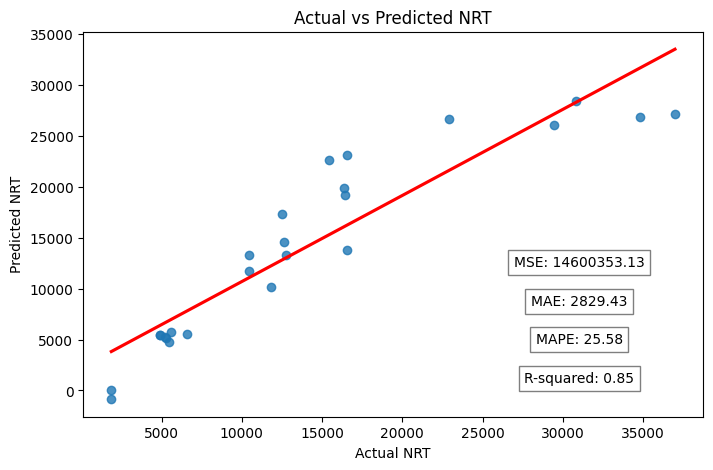

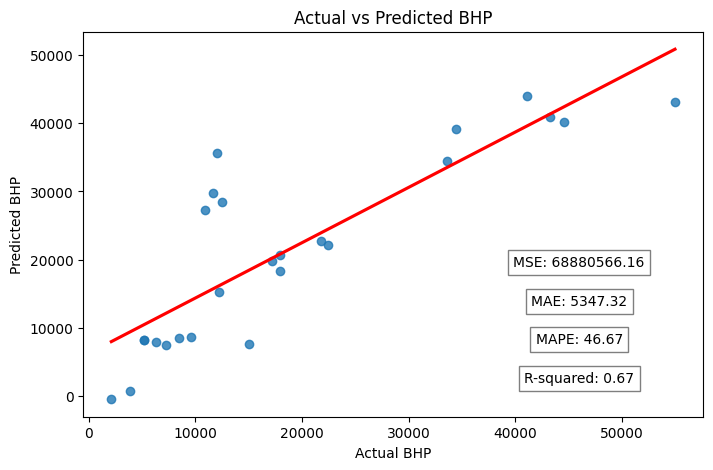

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
# Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 14281269.657183409
R-squared: 0.8935474022597177
Overall MAPE: 12.985409168472247%
Overall MAE: 1755.5827819201465


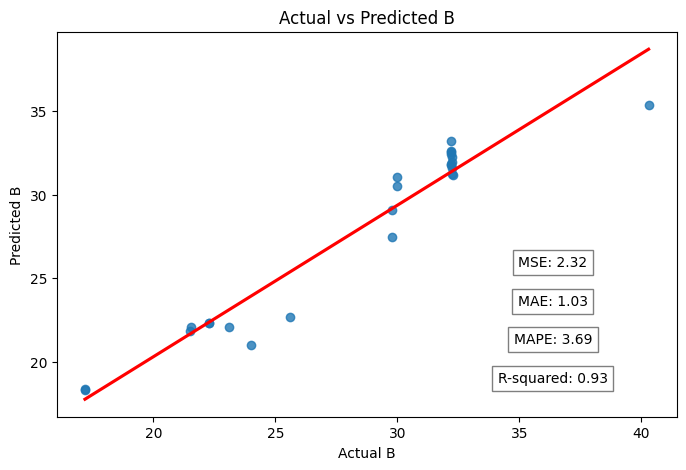

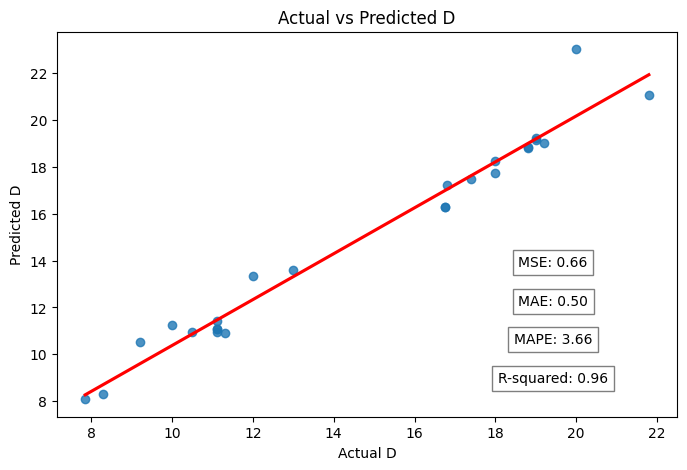

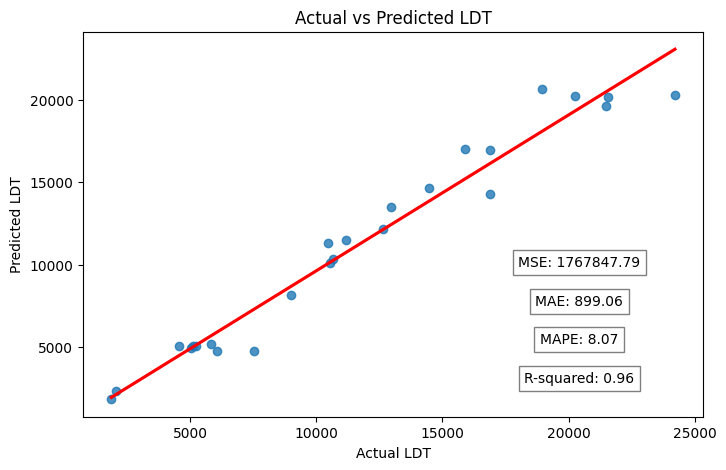

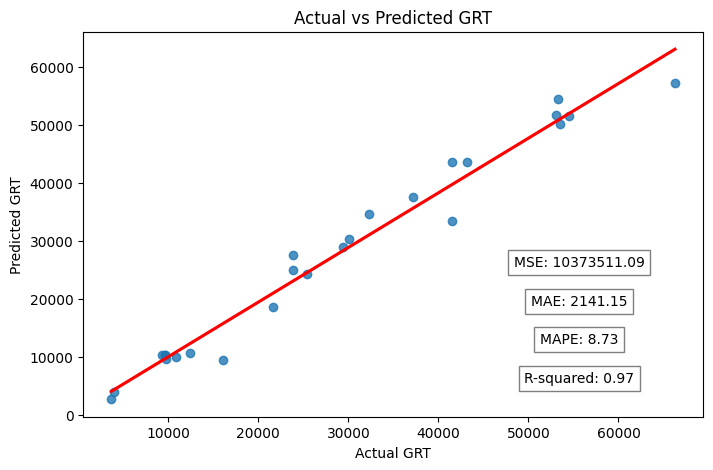

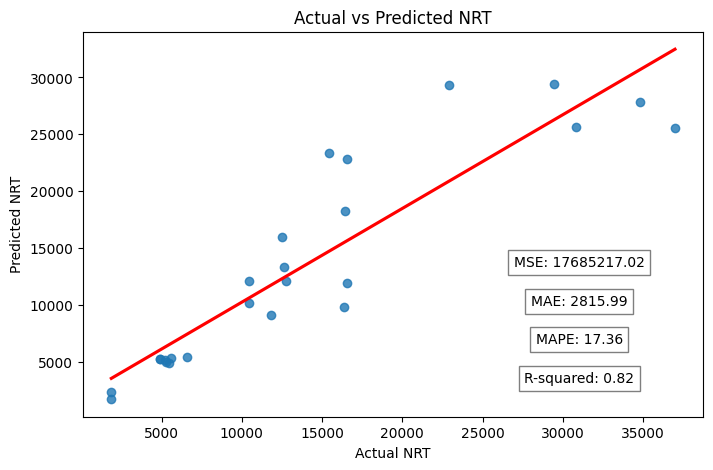

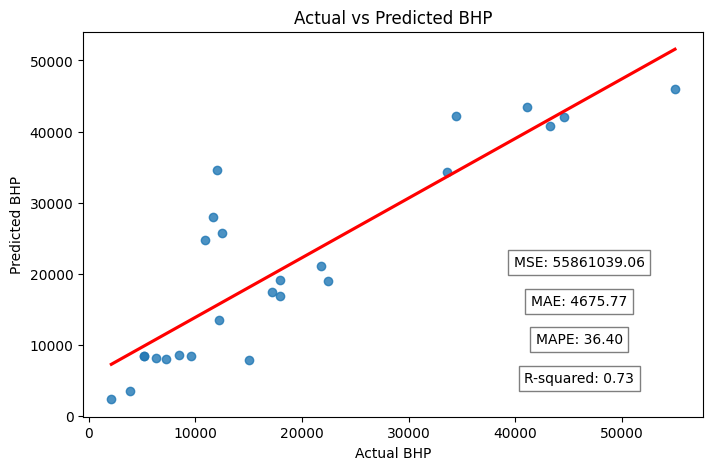

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting features and target
X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')

    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 24302045.67547651
R-squared: 0.8164419692219748
Overall MAPE: 18.031643267532694%
Overall MAE: 2380.3486900000003


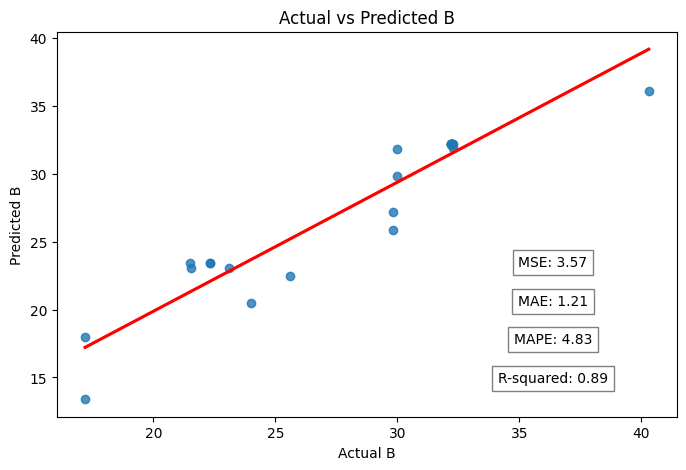

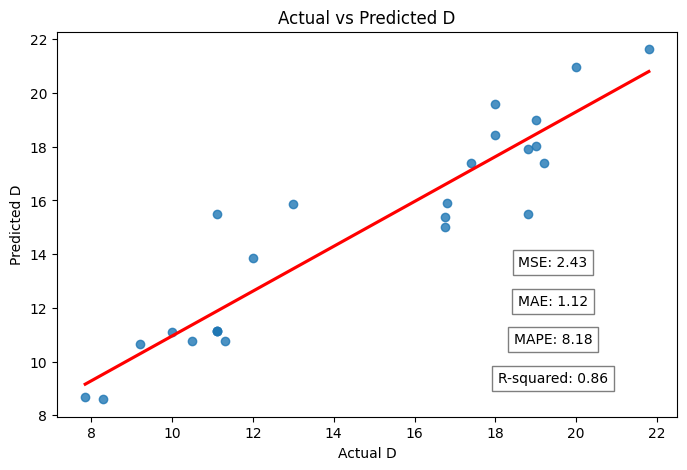

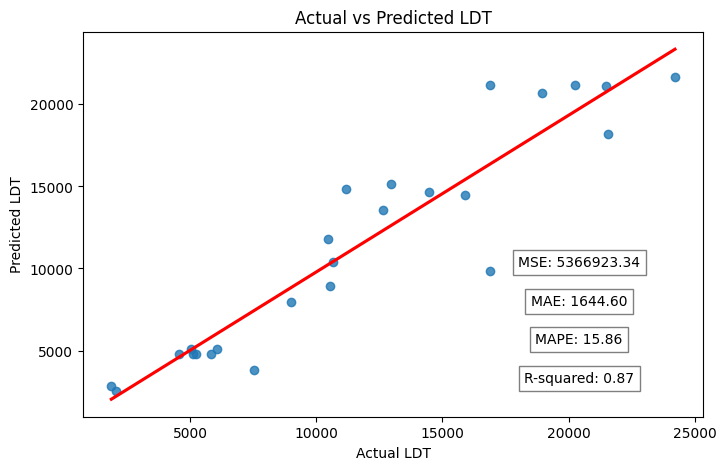

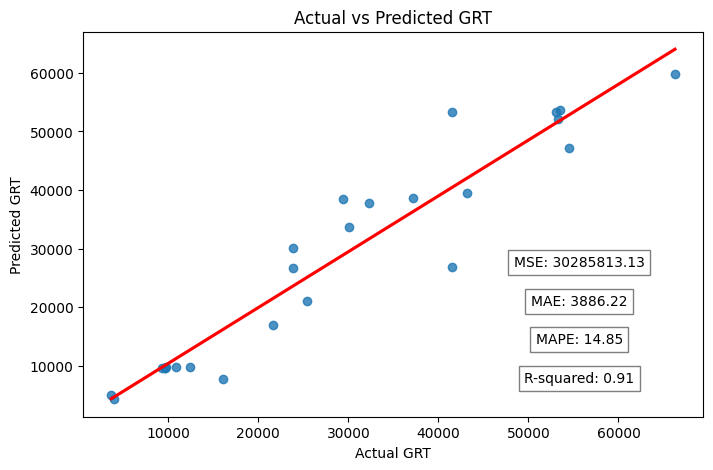

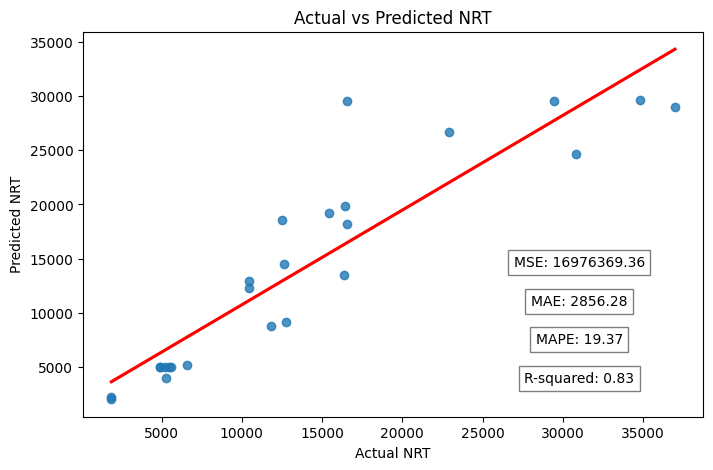

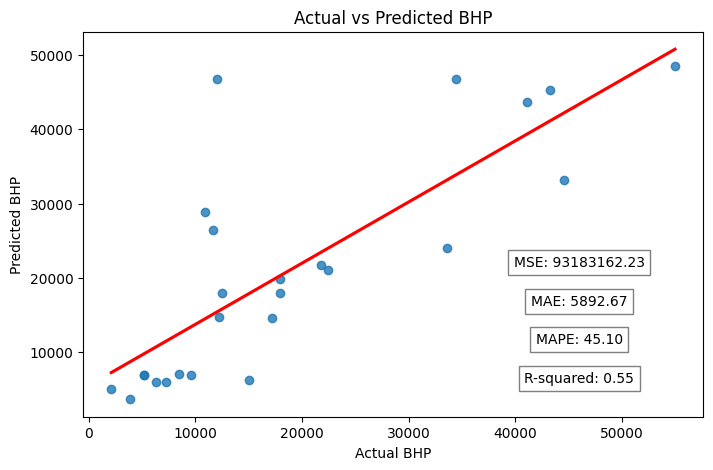

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor model
model = KNeighborsRegressor(n_neighbors=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 18603048.405040726
R-squared: 0.8488809271415132
Overall MAPE: 14.566820526842854%
Overall MAE: 1941.3185799999999


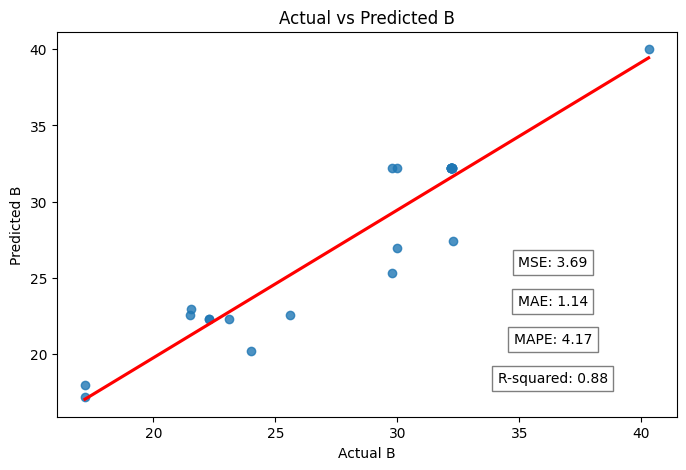

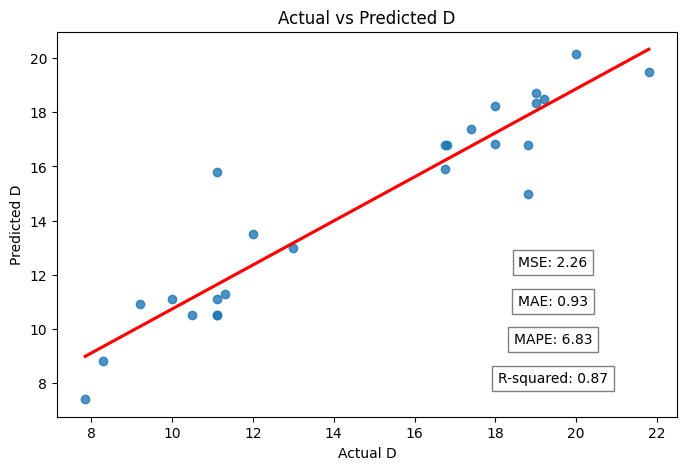

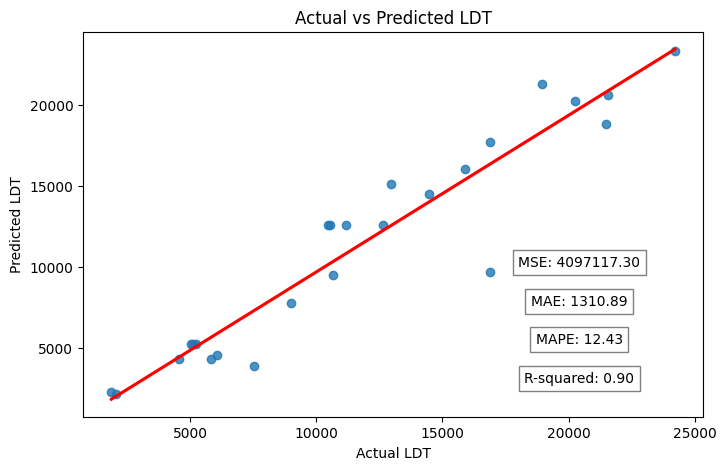

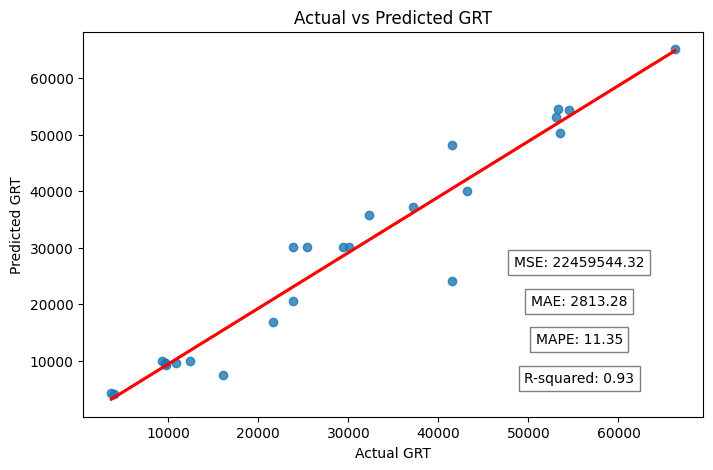

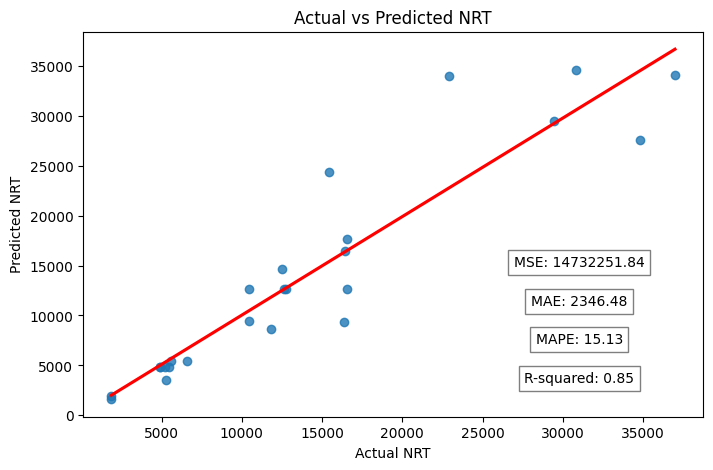

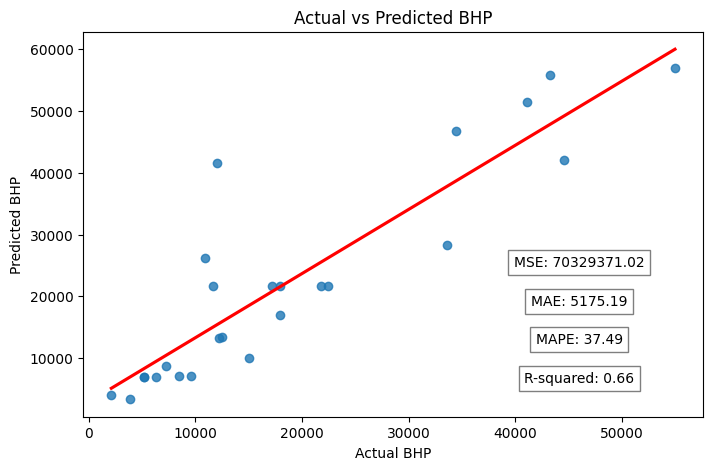

In [6]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 12763142.887640672
R-squared: 0.8975660637248168
Overall MAPE: 13.463537190068267%
Overall MAE: 1597.7573761873016


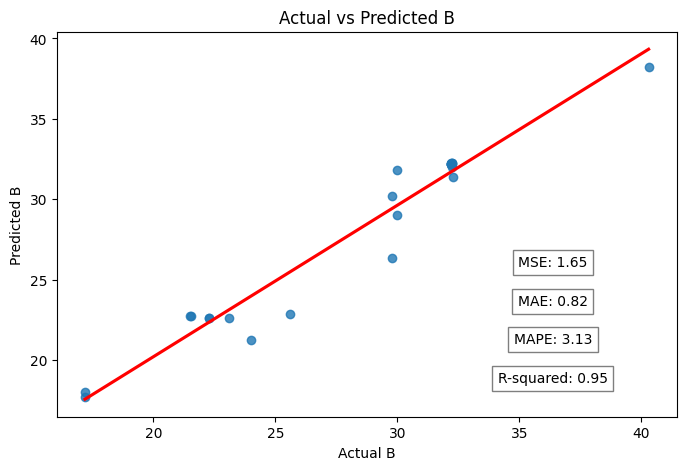

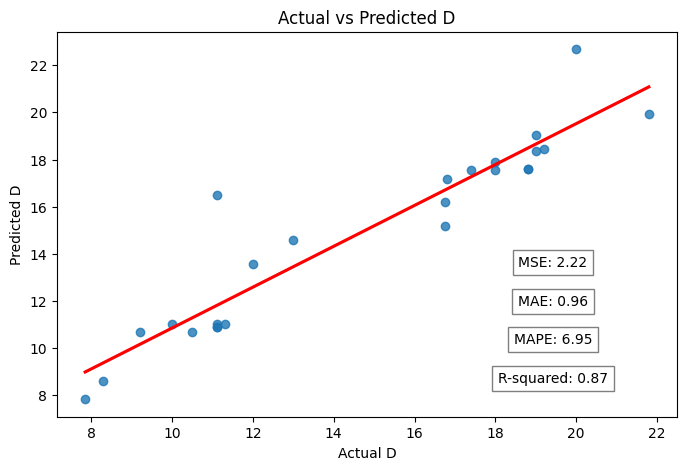

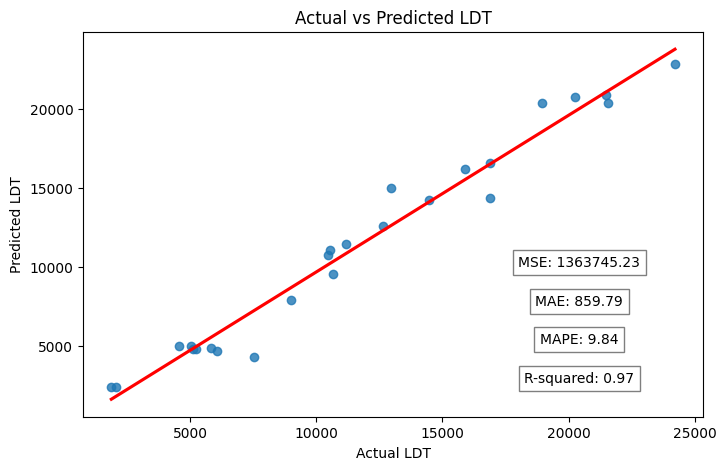

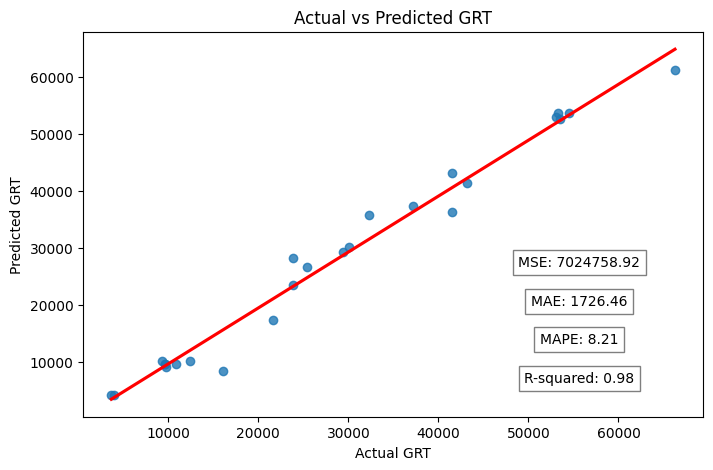

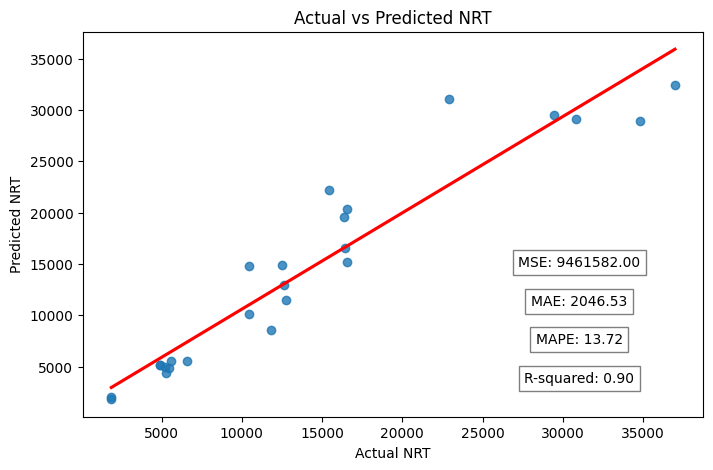

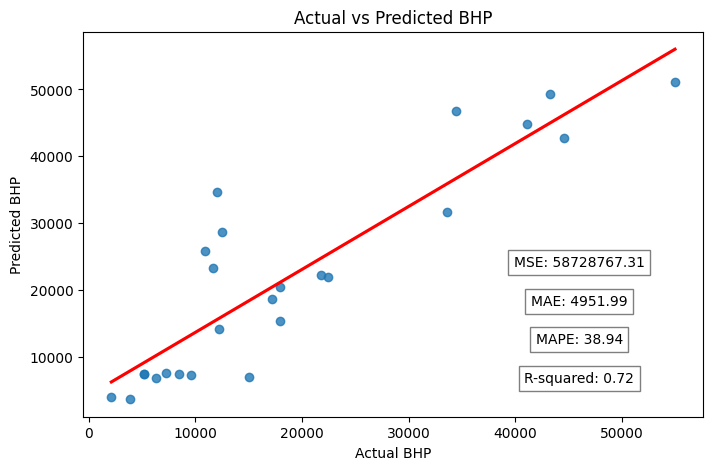

In [7]:
from sklearn.ensemble import RandomForestRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 16120565.689708265
R-squared: 0.852751181726129
Overall MAPE: 18.737131356167012%
Overall MAE: 1923.605060574073


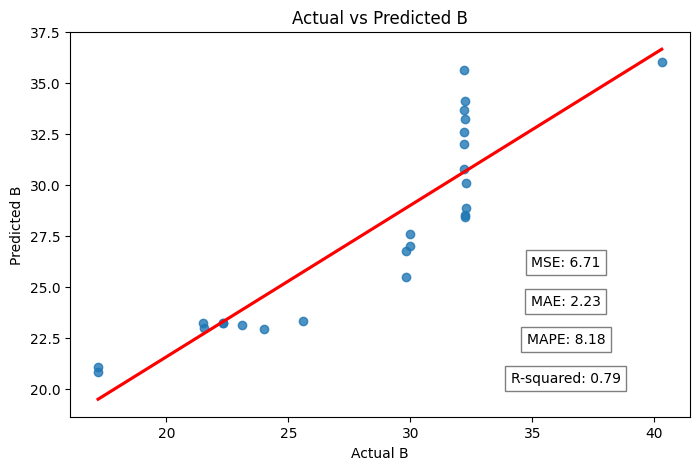

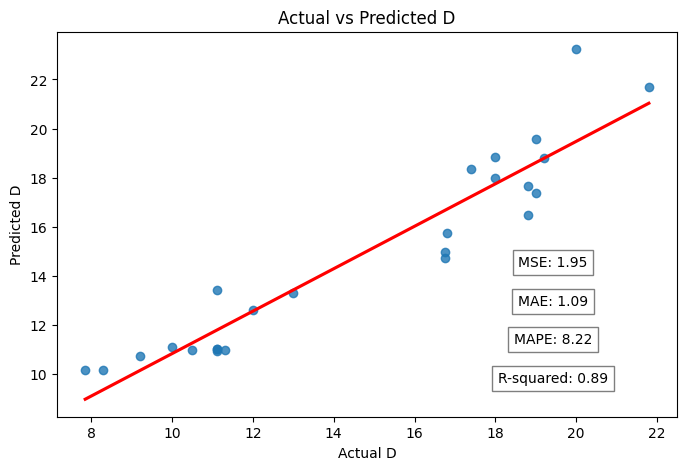

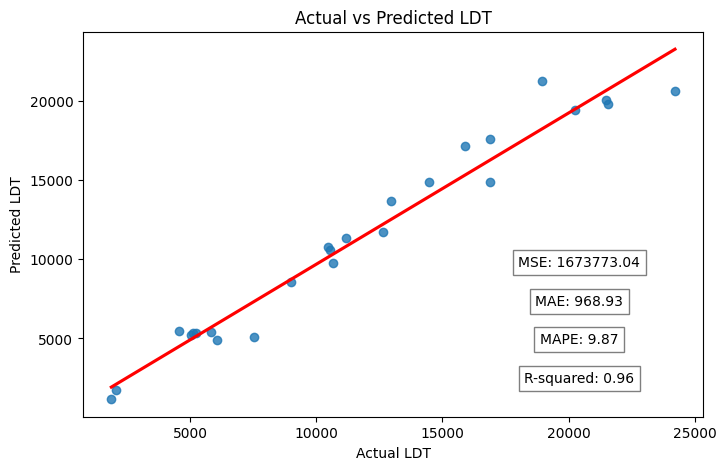

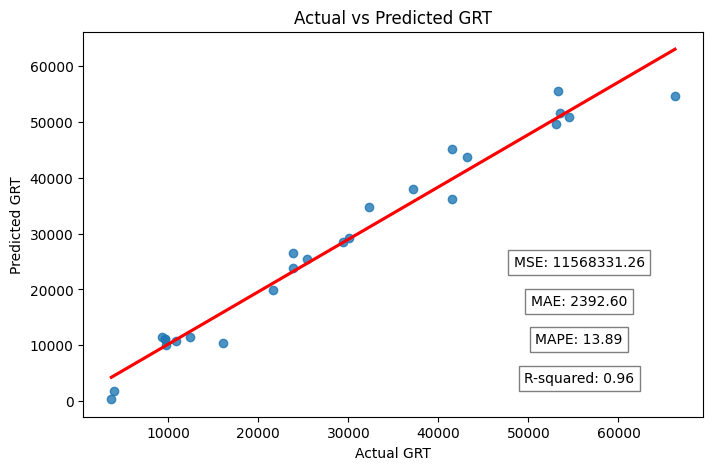

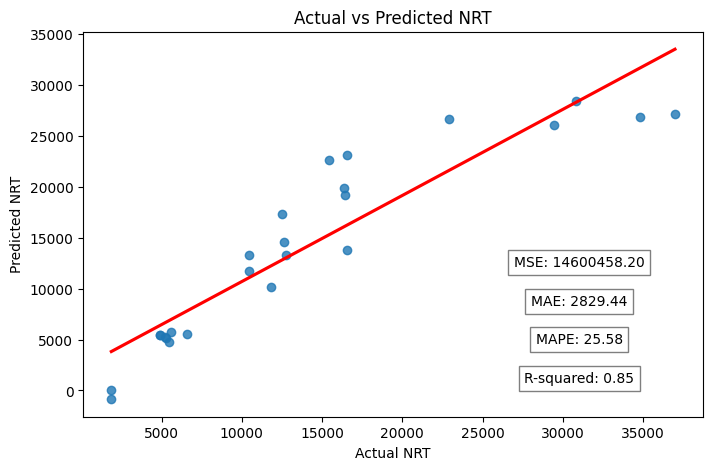

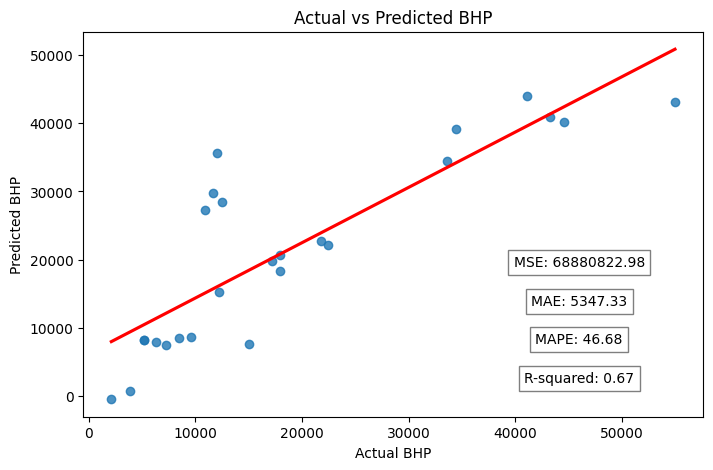

In [8]:
from sklearn.linear_model import Lasso

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regressor model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 16120437.467657616
R-squared: 0.8529995481253101
Overall MAPE: 18.72420613885488%
Overall MAE: 1923.5951747865547


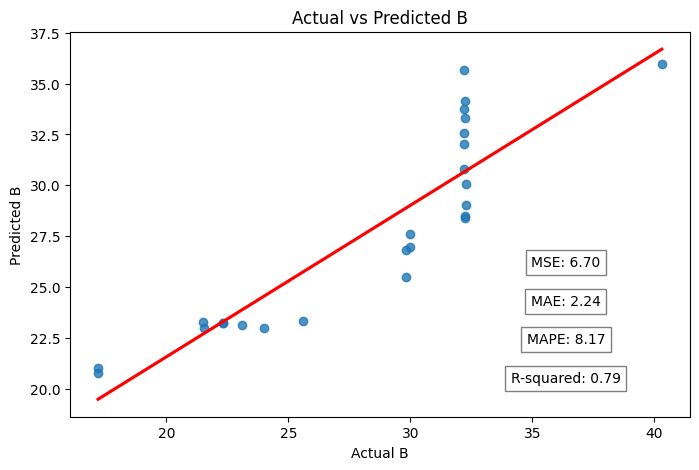

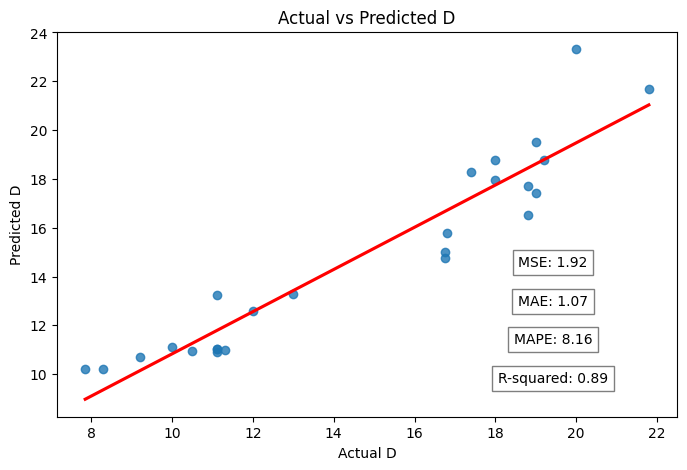

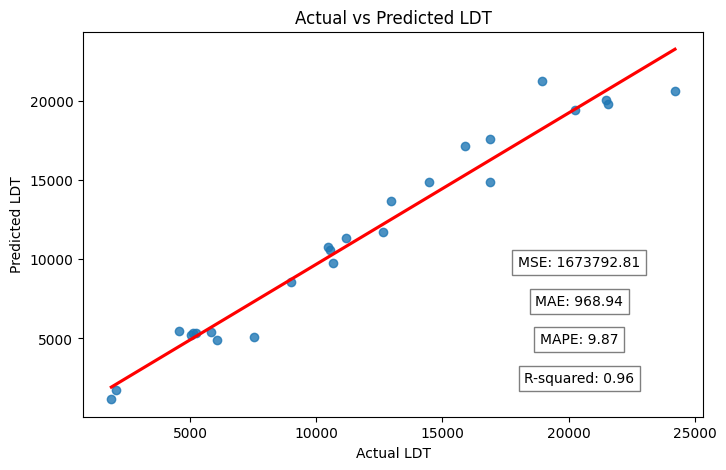

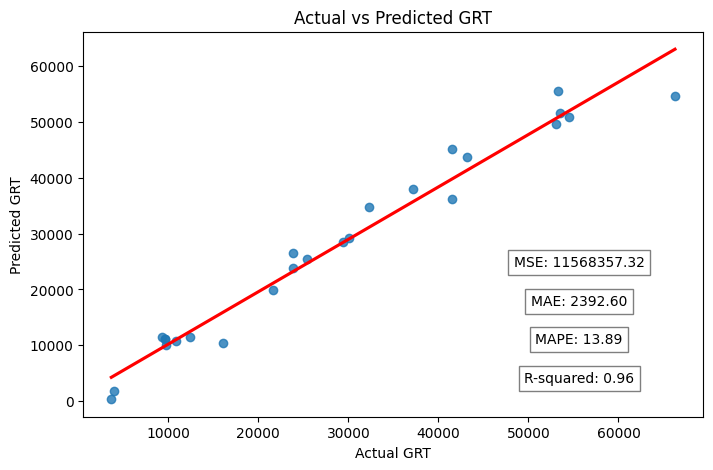

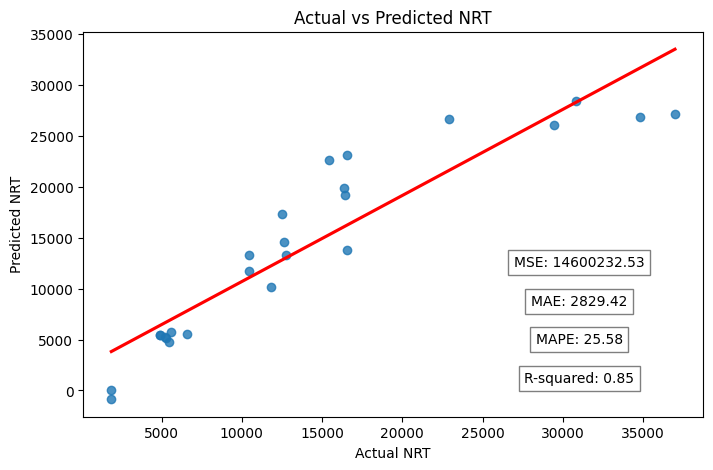

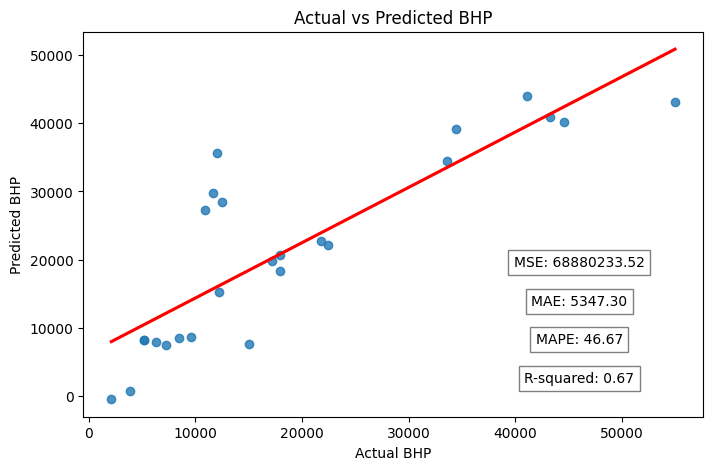

In [9]:
from sklearn.linear_model import Ridge

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regressor model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [10]:
from sklearn.svm import SVR

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressor model
model = SVR()

# Initialize lists to store predictions and true values for each column
y_pred_list = []
y_true_list = []

# Train and predict for each column separately
for col in y.columns:
    # Train the model
    model.fit(X_train, y_train[col])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Append predictions and true values to the lists
    y_pred_list.append(y_pred)
    y_true_list.append(y_test[col])

# Convert lists to arrays
y_pred_array = np.array(y_pred_list).T
y_true_array = np.array(y_true_list).T

# Evaluate the model
mse = mean_squared_error(y_true_array, y_pred_array)
r2 = r2_score(y_true_array, y_pred_array)
mape = np.mean(np.abs((y_true_array - y_pred_array) / y_true_array)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_true_array, y_pred_array)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

Mean Squared Error: 116856848.09760447
R-squared: 0.24795989499567797
Overall MAPE: 63.59133134182156%
Overall MAE: 6589.130939352542


In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize the AdaBoost regressor model
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 1.1426842415226621
R-squared (B): 0.9637056625689001
MAPE (B): 2.878720824581355%
MAE (B): 0.7141369918691817
--------------------------------------------------
Mean Squared Error (D): 1.336560726350817
R-squared (D): 0.9245154907421839
MAPE (D): 6.258247857320717%
MAE (D): 0.8447127487545135
--------------------------------------------------
Mean Squared Error (LDT): 1504031.3460926895
R-squared (LDT): 0.9632018008705268
MAPE (LDT): 15.504410602312173%
MAE (LDT): 998.6344600432114
--------------------------------------------------
Mean Squared Error (GRT): 6695395.981139772
R-squared (GRT): 0.9792882744041589
MAPE (GRT): 12.249113630231573%
MAE (GRT): 1920.7274456295331
--------------------------------------------------
Mean Squared Error (NRT): 7927790.933911141
R-squared (NRT): 0.9186461752400881
MAPE (NRT): 20.502882505978935%
MAE (NRT): 2078.2331298736876
--------------------------------------------------
Mean Squared Error (BHP): 63252772.17547016
R-square

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regressor model
model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 1.572006460453635
R-squared (B): 0.9500693797583611
MAPE (B): 3.0007546950574593%
MAE (B): 0.775678060154478
--------------------------------------------------
Mean Squared Error (D): 1.237267851793471
R-squared (D): 0.9301232224082361
MAPE (D): 5.843736843193315%
MAE (D): 0.7801386566251917
--------------------------------------------------
Mean Squared Error (LDT): 1656176.5265368556
R-squared (LDT): 0.9594793594060461
MAPE (LDT): 12.058886483500011%
MAE (LDT): 1014.8696453196508
--------------------------------------------------
Mean Squared Error (GRT): 8958838.0162755
R-squared (GRT): 0.9722864793697982
MAPE (GRT): 9.555103130930908%
MAE (GRT): 1988.4393847158124
--------------------------------------------------
Mean Squared Error (NRT): 8995724.278268714
R-squared (NRT): 0.9076872003028832
MAPE (NRT): 15.044462499048203%
MAE (NRT): 2137.131445393737
--------------------------------------------------
Mean Squared Error (BHP): 59803191.04341698
R-squared (B

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 2.275232816661217
R-squared (B): 0.9277332577264072
MAPE (B): 3.6083548745337737%
MAE (B): 0.9322940155029289
--------------------------------------------------
Mean Squared Error (D): 0.9382046477487778
R-squared (D): 0.9470133185702105
MAPE (D): 4.958667769406366%
MAE (D): 0.6296852722167968
--------------------------------------------------
Mean Squared Error (LDT): 3110804.985263677
R-squared (LDT): 0.9238898699830448
MAPE (LDT): 12.12215655273755%
MAE (LDT): 1190.286058984375
--------------------------------------------------
Mean Squared Error (GRT): 15670319.076843843
R-squared (GRT): 0.951524995738398
MAPE (GRT): 9.620512431802162%
MAE (GRT): 2198.93576171875
--------------------------------------------------
Mean Squared Error (NRT): 9884076.047985978
R-squared (NRT): 0.8985710650766631
MAPE (NRT): 13.081559032165035%
MAE (NRT): 1983.401513671875
--------------------------------------------------
Mean Squared Error (BHP): 66469928.08878517
R-squared (BH

Epoch 1/700
3/3 [==============================] - 4s 289ms/step - loss: 364281792.0000 - mae: 12193.7812 - val_loss: 476597504.0000 - val_mae: 14541.9609
Epoch 2/700
3/3 [==============================] - 0s 54ms/step - loss: 364280736.0000 - mae: 12193.7578 - val_loss: 476596224.0000 - val_mae: 14541.9355
Epoch 3/700
3/3 [==============================] - 0s 55ms/step - loss: 364279712.0000 - mae: 12193.7334 - val_loss: 476594848.0000 - val_mae: 14541.9092
Epoch 4/700
3/3 [==============================] - 0s 46ms/step - loss: 364278688.0000 - mae: 12193.7109 - val_loss: 476593504.0000 - val_mae: 14541.8809
Epoch 5/700
3/3 [==============================] - 0s 88ms/step - loss: 364277600.0000 - mae: 12193.6855 - val_loss: 476592192.0000 - val_mae: 14541.8535
Epoch 6/700
3/3 [==============================] - 0s 97ms/step - loss: 364276480.0000 - mae: 12193.6611 - val_loss: 476590688.0000 - val_mae: 14541.8252
Epoch 7/700
3/3 [==============================] - 0s 64ms/step - loss: 364

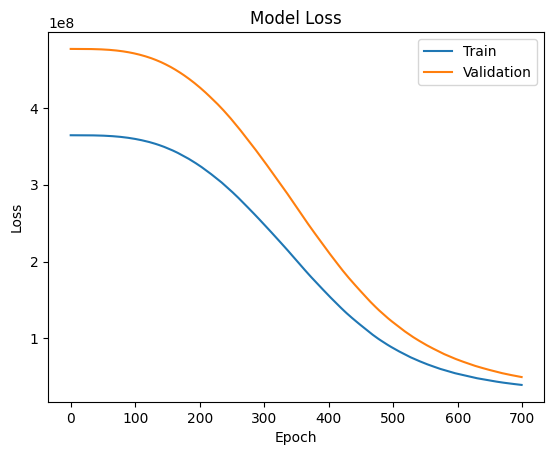

In [21]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))  # Two input features (LOA, DWT)
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Six output targets (B, D, LDT, NRT, GRT, BHP)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=700, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()